### Imports:

In [1]:
import pandas as pd
import os
import time
from astropy.io import fits

### Extractioning the Light Curve:
The light curve data in the .fit files is contained in a list of tuples along with other measurements. <br>
Each tuple is an observation point for a specific time, the observations are taken 30min apart. <br>
We want the 3rd value in each tuple, which corresponds to the corrected flux levels recorded by the instruments in the spacecraft in electrons per second. <br>
#### This loop extracts this data from each .fit file, compiles it into a dataframe, and saves the dataframe as .csv file.

In [2]:
### If extracting from confirmed_planets you must set to item[7] when iterating through items in the .fit data
#     item[2] for k2c1
directory = '../raw_space_data/Kepler_Q4/'
save_name = 'extracted_kep_c4'

In [3]:
start_time = time.time()

# The following lines will prepare things to be run through the loop
col_names = ['star_name', 'exposure']
df = pd.DataFrame(columns = [col_names])
i = 0

for filename in os.listdir(directory): # Loop through every .fit file in the directory
    if i > 5:
        break
    if filename.endswith(".fits"):
   
        fit_data = fits.open(directory + filename)
        if fit_data[1].header['EXPOSURE'] < 65: # if the exposure is less than 65 days, skip this file
            continue
        df.loc[i, 'star_name'] = fit_data[1].header['OBJECT']    # Extract the star's name
        df.loc[i, 'exposure'] = fit_data[1].header['EXPOSURE']   # Extract the amount of time Kepler was recording the target
        
        j = 0 
        for item in fit_data[1].data:     # iterate through the items in the .fit data 
            col_name = 'c_flux_' + str(j) # create the column label
            df.loc[i, col_name] = item[7] # item[7] for confirmed planets, item[2] for k2c1, extract the corrected flux levels for each item and put it all in a row
            
            j += 1
#             if j > 4000: # We won't be needing more columns than this for this project
#                 break
        
        if i % 100 == 0: # save the progress and print out some feedback every 100 files
            df.to_csv(('../' + save_name + '.csv'), index=False)
            print('Rows saved: ', i, ' ', round((time.time() - start_time)/60, 2), ' min runtime.')
        
        i += 1

# Done!
df.to_csv(('../' + save_name + '.csv'), index=False)
print('DONE!!!!!', 'Runtime: ', round((time.time() - start_time)/60, 3), ' minutes')

Rows saved:  0   0.35  min runtime.
DONE!!!!! Runtime:  0.894  minutes


### Check the Dataframe to be Sure Everything Worked:
There should be some null values at the end of most of the rows because not all the light curves are the same length.

In [4]:
df.tail()

star_name exposure c_flux_0      c_flux_1 c_flux_2      c_flux_3  \
1  KIC 1025578  82.7162      NaN  1.292338e+04      NaN  1.291726e+04   
2  KIC 1025986  82.7162      NaN  1.276864e+06      NaN  1.277233e+06   
3  KIC 1026032  82.7162      NaN  1.743618e+04      NaN  1.742921e+04   
4  KIC 1026133  82.7162      NaN  8.089427e+04      NaN  8.090219e+04   
5  KIC 1026146  82.7162      NaN  9.983284e+03      NaN  9.976462e+03   

       c_flux_4      c_flux_5      c_flux_6      c_flux_7      ...       \
1  1.291329e+04  1.292188e+04  1.292211e+04  1.291157e+04      ...        
2  1.277410e+06  1.277653e+06  1.277849e+06  1.278068e+06      ...        
3  1.743379e+04  1.743004e+04  1.743159e+04  1.742726e+04      ...        
4  8.091389e+04  8.088692e+04  8.089593e+04  8.087595e+04      ...        
5  9.980352e+03  9.977871e+03  9.981020e+03  9.990381e+03      ...        

    c_flux_4387   c_flux_4388   c_flux_4389   c_flux_4390   c_flux_4391  \
1  1.291279e+04  1.291749e+04  1.292433e+04  1.292121e+04  1.291119e+04   
2  1.272619e+06  1.273011e+06  1.273417e+06  1.273826e+06  1.274113e+06   
3  1.739245e+04  1.739575e+04  1.739241e+04  1.740589e+04  1.739701e+04   
4  8.090645e+04  8.092413e+04  8.089960e+04  8.091161e+04  8.090157e+04   
5  9.926255e+03  9.916909e+03  9.925319e+03  9.919255e+03  9.934387e+03   

    c_flux_4392   c_flux_4393   c_flux_4394   c_flux_4395   c_flux_4396  
1  1.291699e+04  1.291756e+04  1.293214e+04  1.293186e+04  1.290860e+04  
2  1.274493e+06  1.274748e+06  1.275238e+06  1.275759e+06  1.276052e+06  
3  1.738893e+04  1.740034e+04  1.739358e+04  1.738954e+04  1.738559e+04  
4  8.090039e+04  8.092984e+04  8.091438e+04  8.091408e+04  8.090827e+04  
5  9.915708e+03  9.920430e+03  9.932345e+03  9.912523e+03  9.926744e+03  

[5 rows x 4399 columns]

### Save a Backup File.
Just in case...

In [5]:
# df.to_csv(('../' + save_name + '_backup.csv'), index=False)

Check to see that the file can be read:

In [6]:
# clean = pd.read_csv('../clean_confirmed_planets_part2.csv')
# clean.head()

### Great! Everything looks good!

In [22]:
fit_check = fits.open(directory + 'kplr010000056-2010078095331_llc.fits')


In [23]:
data_check = fit_check[1].data
fit_check[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4397 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [24]:
data_check

FITS_rec([(352.37684219, -0.00089333, 11914, 31065.725, 5.3535604, 1388.4265, 0.42395303,       nan,       nan,     0, nan, nan, nan, nan, 103.04657751, 0.00020784, 246.02113871, 0.00020807, -0.02444879, -0.10927445),
          (352.39727531, -0.00089381, 11915, 30278.242, 5.306459 , 1388.8086, 0.42475742, 33617.54 , 5.8750467,     0, nan, nan, nan, nan, 103.04495465, 0.00021271, 246.02071527, 0.00021291, -0.0244539 , -0.10924027),
          (352.41770854, -0.00089428, 11916,       nan,       nan,       nan,        nan,       nan,       nan, 32816, nan, nan, nan, nan,          nan,        nan,          nan,        nan,         nan,         nan),
          ...,
          (442.16242384, -0.00054718, 16308, 30501.207, 5.318523 , 1342.5193, 0.4242635 , 34128.36 , 5.8891807,     0, nan, nan, nan, nan, 103.09702685, 0.0002105 , 246.19644734, 0.00021028,  0.02660887,  0.08658599),
          (442.18285802, -0.0005466 , 16309, 30310.809, 5.307282 , 1343.1567, 0.42472407, 33887.777, 5.8776503,  

In [25]:
checking = []
for i in range(len(data_check)):
    checking.append(data_check[i][7])

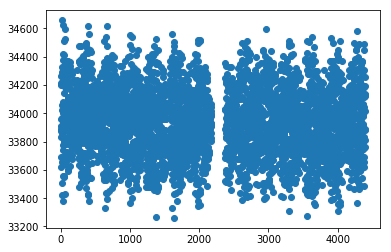

In [26]:
plt.scatter(range(len(data_check)),checking)
# plt.ylim(335900, 336250)

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# checking